<a href="https://colab.research.google.com/github/TJConnellyContingentMacro/NU422/blob/master/Testing_Keras_Neural_Network_on_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

*   Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?




## Management Problem

From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.

# Libraries and Ingest

In [2]:
import pandas as pd

import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
%matplotlib inline

import seaborn as sns  # pretty plotting, including heat map
plt.style.use('fivethirtyeight')

from datetime import datetime

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# BernoulliNB is designed for binary/boolean features
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import roc_auc_score   
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

from sklearn.pipeline import Pipeline



from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils




import warnings
warnings.filterwarnings("ignore")

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

import os

PROJECT_ROOT_DIR = ""
CHAPTER_ID = ""

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "", CHAPTER_ID, fig_id)

print("All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.")

All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.


Using TensorFlow backend.


In [0]:
train = pd.read_csv('s3://terrenceconnelly/DigitRecog_train.csv')
test = pd.read_csv('s3://terrenceconnelly/DigitRecog_test.csv')

# EDA

In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

***Note***: since this won't be submitted to Kaggle, where one could get the correct labels for the test set, instead just use standard split of test/train data for the "test.csv" data

In [0]:
y = train["label"]
x = train.drop(labels = ["label"], axis = 1) 


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=11)


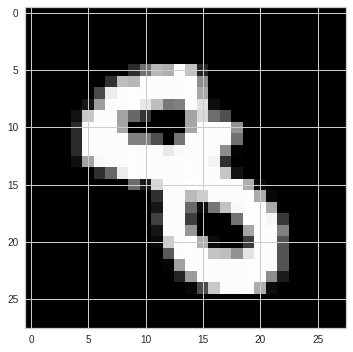

In [8]:
pic1 = y.loc[67]
pic2 = x.loc[67]
pic2 = np.array(pic2, dtype = 'uint8')
pic2 = pic2.reshape(28,28)
plt.imshow(pic2, cmap = 'gray')
plt.show()

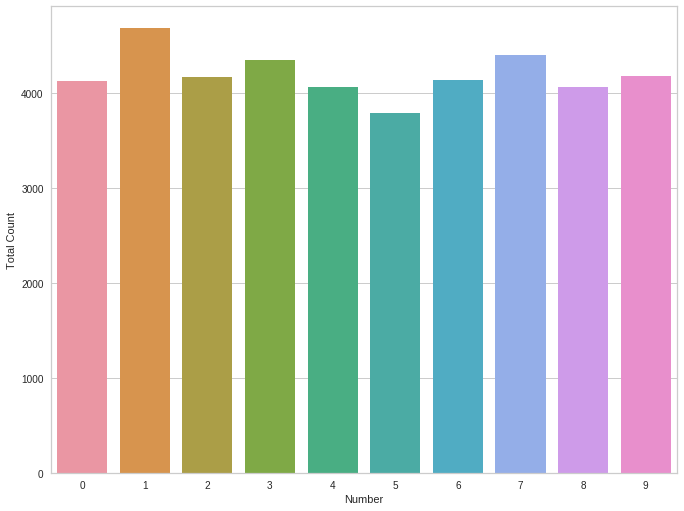

In [9]:
sns.countplot(x = "label", data = train)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xlabel("Number")
plt.ylabel("Total Count")
plt.show()

In [10]:
X_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Normalize the data and reshape

In [11]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# # building the input vector from the 28x28 pixels
X_train = X_train.values.reshape(33600, 784)
X_test = X_test.values.reshape(8400, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (33600, 784)
y_train shape (33600,)
X_test shape (8400, 784)
y_test shape (8400,)
Train matrix shape (33600, 784)
Test matrix shape (8400, 784)


In [12]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (33600,)
Shape after one-hot encoding:  (33600, 10)


# Modeling & Analysis

## 3 Layers with 300, 100 and 10 nodes

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, ]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [16]:
import time
start_time = time.time()

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_test, Y_test))

print("--- %s seconds ---" % (time.time() - start_time))

Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
33600/33600 [==============================] - 7s 197us/sample - loss: 0.7891 - acc: 0.8057 - val_loss: 0.3837 - val_acc: 0.8954
Epoch 2/50
33600/33600 [==============================] - 6s 176us/sample - loss: 0.3314 - acc: 0.9057 - val_loss: 0.3056 - val_acc: 0.9152
Epoch 3/50
33600/33600 [==============================] - 6s 178us/sample - loss: 0.2718 - acc: 0.9224 - val_loss: 0.2747 - val_acc: 0.9227
Epoch 4/50
33600/33600 [==============================] - 6s 177us/sample - loss: 0.2365 - acc: 0.9313 - val_loss: 0.2473 - val_acc: 0.9324
Epoch 5/50
33600/33600 [==============================] - 6s 167us/sample - loss: 0.2102 - acc: 0.9389 - val_loss: 0.2311 - val_acc: 0.9349
Epoch 6/50
33600/33600 [==============================] - 6s 167us/sample - loss: 0.1900 - acc: 0.9449 - val_loss: 0.2128 - val_acc: 0.9418
Epoch 7/50
33600/33600 [==============================] - 6s 17

In [17]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 50,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 33600,
 'steps': None,
 'verbose': 0}

In [18]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Saving figure keras_learning_curves_plot


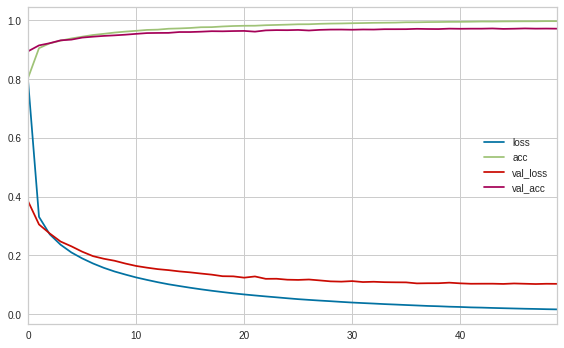

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

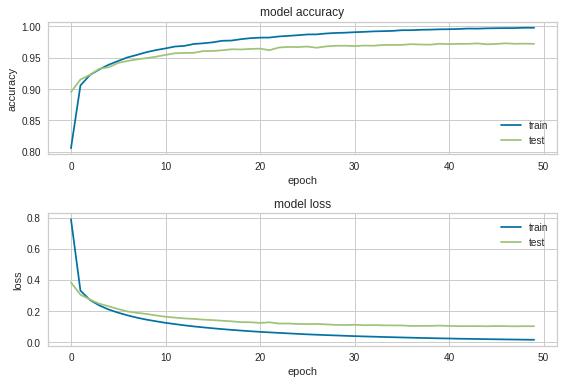

In [20]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [21]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

 - 0s - loss: 0.1033 - acc: 0.9721
Test Loss 0.10331202797342225
Test Accuracy 0.9721429


## Now Run 3 Layers But 2x the Nodes

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 9s 276us/sample - loss: 0.7289 - acc: 0.8272 - val_loss: 0.3612 - val_acc: 0.9046
Epoch 2/50
33600/33600 [==============================] - 10s 283us/sample - loss: 0.3165 - acc: 0.9107 - val_loss: 0.2946 - val_acc: 0.9174
Epoch 3/50
33600/33600 [==============================] - 9s 278us/sample - loss: 0.2617 - acc: 0.9249 - val_loss: 0.2629 - val_acc: 0.9265
Epoch 4/50
33600/33600 [==============================] - 9s 278us/sample - loss: 0.2283 - acc: 0.9351 - val_loss: 0.2374 - val_acc: 0.9342
Epoch 5/50
33600/33600 [==============================] - 10s 296us/sample - loss: 0.2022 - acc: 0.9418 - val_loss: 0.2175 - val_acc: 0.9407
Epoch 6/50
33600/33600 [==============================] - 10s 288us/sample - loss: 0.1814 - acc: 0.9485 - val_loss: 0.2120 - val_acc: 0.9401
Epoch 7/50
33600/33600 [==============================] - 10s 302us/sample - loss: 0.1643 - acc: 0.9538 - va

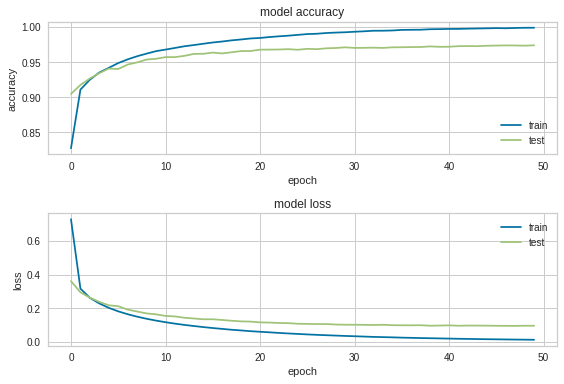

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, ]),
    keras.layers.Dense(600, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')


start_time = time.time()


history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_test, Y_test))

print("--- %s seconds ---" % (time.time() - start_time))



fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [23]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

 - 1s - loss: 0.0956 - acc: 0.9738
Test Loss 0.09563062831299335
Test Accuracy 0.97380954


Saving figure keras_learning_curves_plot


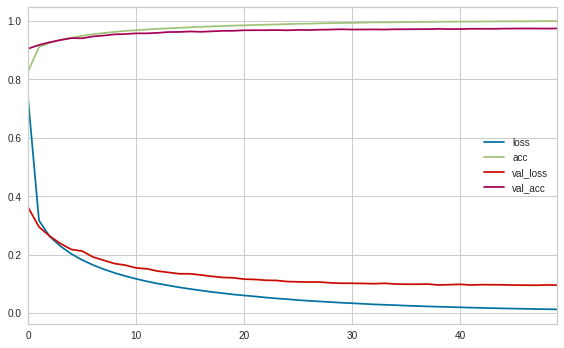

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

## Increase Layers to 6, Back Down the the Nodes - to 100 each

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 5s 162us/sample - loss: 1.2111 - acc: 0.6531 - val_loss: 0.4361 - val_acc: 0.8649
Epoch 2/50
33600/33600 [==============================] - 5s 157us/sample - loss: 0.3495 - acc: 0.8962 - val_loss: 0.3024 - val_acc: 0.9119
Epoch 3/50
33600/33600 [==============================] - 5s 155us/sample - loss: 0.2626 - acc: 0.9216 - val_loss: 0.2580 - val_acc: 0.9217
Epoch 4/50
33600/33600 [==============================] - 5s 153us/sample - loss: 0.2118 - acc: 0.9365 - val_loss: 0.2145 - val_acc: 0.9400
Epoch 5/50
33600/33600 [==============================] - 5s 152us/sample - loss: 0.1769 - acc: 0.9472 - val_loss: 0.1935 - val_acc: 0.9444
Epoch 6/50
33600/33600 [==============================] - 5s 152us/sample - loss: 0.1523 - acc: 0.9540 - val_loss: 0.1865 - val_acc: 0.9449
Epoch 7/50
33600/33600 [==============================] - 5s 150us/sample - loss: 0.1331 - acc: 0.9591 - val_lo

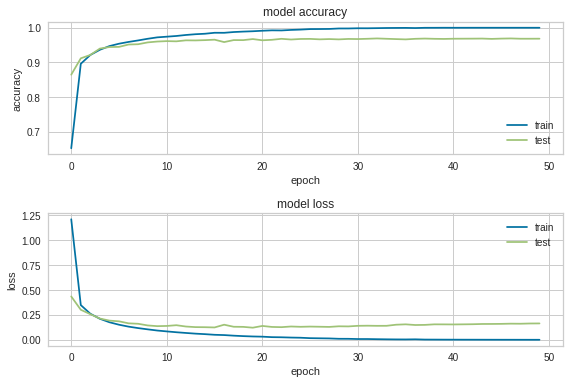

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, ]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
     keras.layers.Dense(100, activation="relu"),
     keras.layers.Dense(100, activation="relu"),
     keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
start_time = time.time()


history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_test, Y_test))

print("--- %s seconds ---" % (time.time() - start_time))


fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [26]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

 - 0s - loss: 0.1652 - acc: 0.9685
Test Loss 0.16524877989974074
Test Accuracy 0.9684524


Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 18s 534us/sample - loss: 0.7883 - acc: 0.7921 - val_loss: 0.3184 - val_acc: 0.9060
Epoch 2/50
33600/33600 [==============================] - 18s 523us/sample - loss: 0.2590 - acc: 0.9226 - val_loss: 0.2581 - val_acc: 0.9236
Epoch 3/50
33600/33600 [==============================] - 18s 524us/sample - loss: 0.1894 - acc: 0.9451 - val_loss: 0.1982 - val_acc: 0.9427
Epoch 4/50
33600/33600 [==============================] - 18s 523us/sample - loss: 0.1482 - acc: 0.9558 - val_loss: 0.1617 - val_acc: 0.9527
Epoch 5/50
33600/33600 [==============================] - 17s 520us/sample - loss: 0.1190 - acc: 0.9655 - val_loss: 0.1603 - val_acc: 0.9513
Epoch 6/50
33600/33600 [==============================] - 17s 515us/sample - loss: 0.0998 - acc: 0.9704 - val_loss: 0.1323 - val_acc: 0.9613
Epoch 7/50
33600/33600 [==============================] - 17s 518us/sample - loss: 0.0828 - acc: 0.9751 -

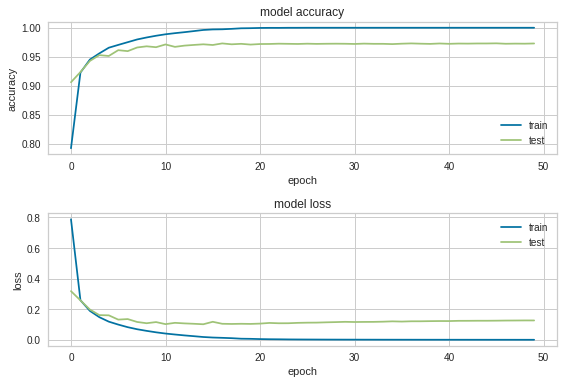

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784, ]),
    keras.layers.Dense(600, activation="relu"),
    keras.layers.Dense(500, activation="relu"),
     keras.layers.Dense(400, activation="relu"),
     keras.layers.Dense(300, activation="relu"),
     keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
start_time = time.time()


history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_test, Y_test))

print("--- %s seconds ---" % (time.time() - start_time))


fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [28]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

 - 1s - loss: 0.1268 - acc: 0.9729
Test Loss 0.12679836423226723
Test Accuracy 0.9728571


# Conclusion

Adjusting nodes and layers can be very useful for speeding up processing time with a trade-off between time and accuracy and loss rates.    For the purposes of the kind of visualization analysis conducted here fewer layers with more nodes would likely prove most efficient with relatively high accuracy scores.   